# Importando Bibliotecas

In [257]:
#importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , f1_score, precision_score, recall_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
%matplotlib inline

# Abrindo arquivo

In [258]:

data = pd.read_parquet('dataset_cdjr.parquet.gzip')
#Verificando as 5 primeiras linhas do arquivo a ser utilizado
display(data.head())

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
337,200.0,2,662.28,39.10,-188.55,0.246978,761,0.004548,3.523703,167326,33441.06,0.019804,26.850,0.009198,94.611429,7,0
266,150.0,2,0.00,149.55,-0.45,0.150000,3,0.037975,0.000000,79,78.93,0.000000,0.000,0.000000,0.000000,0,1
236,50.0,1,346.08,30.41,-102.10,2.430952,42,0.004239,3.389618,9907,18858.77,0.018351,25.525,0.095238,86.520000,4,0
274,100.0,2,0.00,43.84,-56.16,0.150968,372,0.005854,0.000000,63544,1164.11,0.000000,0.000,0.000000,0.000000,0,1
208,50.0,1,87.56,-3.05,-94.50,0.412664,229,0.004572,0.926561,50089,1786.26,0.049019,94.500,0.004367,87.560000,1,0


# Análise exploratória dos dados

In [259]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466 entries, 337 to 92
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature0   466 non-null    float64
 1   feature1   466 non-null    int64  
 2   feature2   466 non-null    float64
 3   feature3   466 non-null    float64
 4   feature4   466 non-null    float64
 5   feature5   466 non-null    float64
 6   feature6   466 non-null    int64  
 7   feature7   466 non-null    float64
 8   feature8   466 non-null    float64
 9   feature9   466 non-null    int64  
 10  feature10  466 non-null    float64
 11  feature11  466 non-null    float64
 12  feature12  466 non-null    float64
 13  feature13  466 non-null    float64
 14  feature14  466 non-null    float64
 15  feature15  466 non-null    int64  
 16  target     466 non-null    int64  
dtypes: float64(12), int64(5)
memory usage: 65.5 KB


In [260]:
tipos_de_dados = pd.DataFrame(data.dtypes, columns= ['Tipos de Dados'])
tipos_de_dados.columns.name = 'Variáveis'
tipos_de_dados

Variáveis,Tipos de Dados
feature0,float64
feature1,int64
feature2,float64
feature3,float64
feature4,float64
feature5,float64
feature6,int64
feature7,float64
feature8,float64
feature9,int64


In [261]:
list_index = pd.DataFrame(data.index)
list_index

,0
0,337
1,266
2,236
3,274
4,208
...,...
461,490
462,175
463,417
464,131


In [262]:
# Contagem de valores faltantes
data.isnull().sum()

feature0     0
feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
target       0
dtype: int64

In [263]:
# linhas duplicadas

data.duplicated()

337    False
266    False
236    False
274    False
208    False
       ...  
490    False
175    False
417    False
131    False
92     False
Length: 466, dtype: bool

In [264]:
# Removendo duplicadas
data = data.drop_duplicates()
data
# Observe que o numero de linha se manteve, logo não temos linhas duplicadas 

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
337,200.0,2,662.28,39.10,-188.55,0.246978,761,0.004548,3.523703,167326,33441.06,0.019804,26.850000,0.009198,94.611429,7,0
266,150.0,2,0.00,149.55,-0.45,0.150000,3,0.037975,0.000000,79,78.93,0.000000,0.000000,0.000000,0.000000,0,1
236,50.0,1,346.08,30.41,-102.10,2.430952,42,0.004239,3.389618,9907,18858.77,0.018351,25.525000,0.095238,86.520000,4,0
274,100.0,2,0.00,43.84,-56.16,0.150968,372,0.005854,0.000000,63544,1164.11,0.000000,0.000000,0.000000,0.000000,0,1
208,50.0,1,87.56,-3.05,-94.50,0.412664,229,0.004572,0.926561,50089,1786.26,0.049019,94.500000,0.004367,87.560000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,1300.0,7,12133.73,244.30,-1081.90,0.395307,2642,0.008152,11.617895,324081,17343.28,0.699621,12.893827,0.030659,149.799136,81,0
175,350.0,1,0.00,-1.99,-351.99,0.684805,514,0.004000,0.000000,128499,2263.65,0.000000,0.000000,0.000000,0.000000,0,1
417,400.0,4,1100.07,-18.20,-438.60,0.748464,586,0.003683,2.508140,159109,5303.10,0.207439,62.657143,0.011945,157.152857,7,0
131,150.0,1,0.00,114.30,-35.70,0.300000,119,0.003834,0.000000,31040,334.59,0.000000,0.000000,0.000000,0.000000,0,0


# Preparação dos dados

In [265]:
display(data)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,target
337,200.0,2,662.28,39.10,-188.55,0.246978,761,0.004548,3.523703,167326,33441.06,0.019804,26.850000,0.009198,94.611429,7,0
266,150.0,2,0.00,149.55,-0.45,0.150000,3,0.037975,0.000000,79,78.93,0.000000,0.000000,0.000000,0.000000,0,1
236,50.0,1,346.08,30.41,-102.10,2.430952,42,0.004239,3.389618,9907,18858.77,0.018351,25.525000,0.095238,86.520000,4,0
274,100.0,2,0.00,43.84,-56.16,0.150968,372,0.005854,0.000000,63544,1164.11,0.000000,0.000000,0.000000,0.000000,0,1
208,50.0,1,87.56,-3.05,-94.50,0.412664,229,0.004572,0.926561,50089,1786.26,0.049019,94.500000,0.004367,87.560000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,1300.0,7,12133.73,244.30,-1081.90,0.395307,2642,0.008152,11.617895,324081,17343.28,0.699621,12.893827,0.030659,149.799136,81,0
175,350.0,1,0.00,-1.99,-351.99,0.684805,514,0.004000,0.000000,128499,2263.65,0.000000,0.000000,0.000000,0.000000,0,1
417,400.0,4,1100.07,-18.20,-438.60,0.748464,586,0.003683,2.508140,159109,5303.10,0.207439,62.657143,0.011945,157.152857,7,0
131,150.0,1,0.00,114.30,-35.70,0.300000,119,0.003834,0.000000,31040,334.59,0.000000,0.000000,0.000000,0.000000,0,0


In [266]:
#separa as features 
features = data.drop(['target'],1)
#separa as labels
labels = data['target']

print('Features')
print (features.head())

print ('=========')

print ('Labels')
print (labels.head())

Features
     feature0  feature1  feature2  feature3  feature4  feature5  feature6  \
337     200.0         2    662.28     39.10   -188.55  0.246978       761   
266     150.0         2      0.00    149.55     -0.45  0.150000         3   
236      50.0         1    346.08     30.41   -102.10  2.430952        42   
274     100.0         2      0.00     43.84    -56.16  0.150968       372   
208      50.0         1     87.56     -3.05    -94.50  0.412664       229   

     feature7  feature8  feature9  feature10  feature11  feature12  feature13  \
337  0.004548  3.523703    167326   33441.06   0.019804     26.850   0.009198   
266  0.037975  0.000000        79      78.93   0.000000      0.000   0.000000   
236  0.004239  3.389618      9907   18858.77   0.018351     25.525   0.095238   
274  0.005854  0.000000     63544    1164.11   0.000000      0.000   0.000000   
208  0.004572  0.926561     50089    1786.26   0.049019     94.500   0.004367   

     feature14  feature15  
337  94.61142

C:\Users\seiff\AppData\Local\Temp\ipykernel_16800\1240779292.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  features = data.drop(['target'],1)


## Montando lista de teste e treino

In [267]:
X_train, X_test,y_train, y_test = train_test_split(features,labels, train_size= 0.5, random_state= 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((233, 16), (233, 16), (233,), (233,))

## Analisando e escolhendo a melhor quantidade de K

In [268]:
# Escolhendo as melhores features com Kbest
k_vs_score = []
for k in range(1,12,1):
    selector = SelectKBest(score_func= f_regression, k= k)
    X_train2 = selector.fit_transform(X_train,y_train)
    X_test2 = selector.transform(X_test)

    mdl = RandomForestClassifier(n_estimators= 100, n_jobs= -1, random_state= 0)
    mdl.fit(X_train2, y_train)

    p = mdl.predict(X_test2)

    score = mean_absolute_error(y_test, p)

    print("K = {} - MAE = {}".format(k,score))

    k_vs_score.append(score)

K = 1 - MAE = 0.463519313304721
K = 2 - MAE = 0.44635193133047213
K = 3 - MAE = 0.4334763948497854
K = 4 - MAE = 0.43776824034334766
K = 5 - MAE = 0.3948497854077253
K = 6 - MAE = 0.41630901287553645
K = 7 - MAE = 0.4034334763948498
K = 8 - MAE = 0.4034334763948498
K = 9 - MAE = 0.4248927038626609
K = 10 - MAE = 0.41630901287553645
K = 11 - MAE = 0.3905579399141631


<AxesSubplot:>

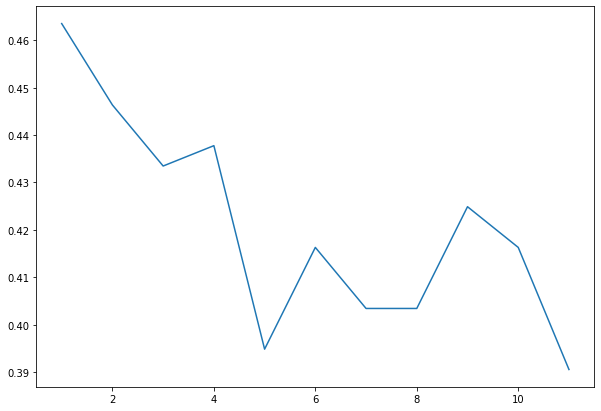

In [269]:
pd.Series(k_vs_score, index=range(1,12,1)).plot(figsize = (10,7))

In [270]:
# K = 5, pois é o menor valor de erro para uma intervalo continuo.
selector = SelectKBest(score_func= f_regression, k= 5)
selector.fit(X_train,y_train)

SelectKBest(k=5, score_func=<function f_regression at 0x00000217FF6DBC70>)

In [271]:
# vendo quais feature contribuiram para o valor de K
mask = selector.get_support()
X_train.iloc[:, mask]

,feature1,feature2,feature6,feature10,feature13
404,4,0.00,810,489.71,0.000000
120,1,0.00,24,592.00,0.000000
316,2,219.97,325,0.00,0.006154
302,2,89.90,1243,1193.95,0.000805
88,1,0.00,283,8924.38,0.000000
...,...,...,...,...,...
385,3,1006.80,846,9156.39,0.007092
364,3,61.89,717,655.11,0.001395
85,0,1074.85,223,0.00,0.053812
303,2,57.27,309,699.23,0.003236


In [272]:
X_train.columns[mask]

Index(['feature1', 'feature2', 'feature6', 'feature10', 'feature13'], dtype='object')

In [273]:
pd.Series(selector.scores_, index = X_train.columns).sort_values().tail(6)

feature3     3.388168
feature10    4.013632
feature1     4.723944
feature2     5.498818
feature6     5.925416
feature13    8.622084
dtype: float64

<AxesSubplot:>

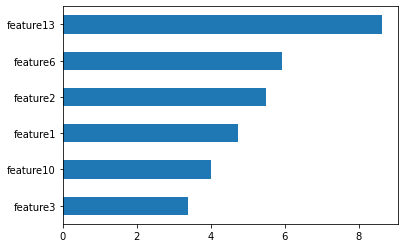

In [274]:
pd.Series(selector.scores_, index = X_train.columns).sort_values().tail(6).plot.barh()

# Modelagem

## Separa as features com base nas melhores features para treinamento

In [275]:
# 'feature1', 'feature2', 'feature6', 'feature10', 'feature13'
features = data.drop(['target','feature0','feature3','feature4','feature5','feature7','feature8','feature9','feature11','feature12','feature14','feature15',],1)
#separa as labels para treinamento
labels = data['target']
print('Features')
print (features.head())

print ('=========')

print ('Labels')
print (labels.head())

Features
     feature1  feature2  feature6  feature10  feature13
337         2    662.28       761   33441.06   0.009198
266         2      0.00         3      78.93   0.000000
236         1    346.08        42   18858.77   0.095238
274         2      0.00       372    1164.11   0.000000
208         1     87.56       229    1786.26   0.004367
Labels
337    0
266    1
236    0
274    1
208    0
Name: target, dtype: int64


C:\Users\seiff\AppData\Local\Temp\ipykernel_16800\80792988.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  features = data.drop(['target','feature0','feature3','feature4','feature5','feature7','feature8','feature9','feature11','feature12','feature14','feature15',],1)


In [276]:
# Normalizando os dados de entrada(features)
# Gerando o novo padrão
scaler = MinMaxScaler().fit(features)
features_scale = scaler.transform(features)

print ('Features: ',features_scale.shape)
print (features_scale)

Features:  (466, 5)
[[6.45161290e-02 1.64373199e-02 6.47911338e-02 1.40992782e-01
  4.49556736e-02]
 [6.45161290e-02 0.00000000e+00 1.70502984e-04 3.32781326e-04
  0.00000000e+00]
 [3.22580645e-02 8.58946014e-03 3.49531117e-03 7.95115480e-02
  4.65459423e-01]
 ...
 [1.29032258e-01 2.73029572e-02 4.98721228e-02 2.23587058e-02
  5.83810027e-02]
 [3.22580645e-02 0.00000000e+00 1.00596760e-02 1.41068420e-03
  0.00000000e+00]
 [3.22580645e-02 0.00000000e+00 2.13128730e-03 0.00000000e+00
  0.00000000e+00]]


## Separando em treinamento e teste 

In [277]:
X_train, X_test,y_train, y_test = train_test_split(features,labels, train_size= 0.5, random_state= 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((233, 5), (233, 5), (233,), (233,))

In [324]:
#Treinando e testando os modelos
print ('LogisticRegression')


clf_LR = LogisticRegression(max_iter=5000)
clf_LR.fit(X_train, y_train)
pred= clf_LR.predict(X_test)

lg_acc = accuracy_score(y_test, pred)
f1_lg_acc=f1_score(y_test,pred,average = 'binary')
print ('Acurácia LogisticRegression: {}'.format(lg_acc))
print ('F1 Score: {}'.format(f1_lg_acc) )

LogisticRegression
Acurácia LogisticRegression: 0.5622317596566524
F1 Score: 0.679245283018868


In [323]:
#Testando LogistRegression hyper parameters

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid)

search.fit(X_train,y_train)
clf = search.best_estimator_
pred= clf.predict(X_test)
lg_acc_2 = accuracy_score(y_test, pred)
f1_lg_acc_2=f1_score(y_test,pred,average = 'binary')
print ('Acurácia LogisticRegression hyper parameters: {}'.format(lg_acc_2))
print ('F1 Score: {}'.format(f1_lg_acc_2) )

print (clf)

Acurácia LogisticRegression hyper parameters: 0.5622317596566524
F1 Score: 0.679245283018868
LogisticRegression(C=0.001, max_iter=1000)


In [322]:
#Treinando e testando os modelos
print ('SVC')
clf = SVC()
clf.fit(X_train, y_train)
pred= clf.predict(X_test)
svc_acc = accuracy_score(y_test, pred)
f1_svc_acc=f1_score(y_test,pred, average='binary')
print ('Acurácia SVC: {}'.format(svc_acc))
print ('F1 Score: {}'.format(f1_svc_acc) )

SVC
Acurácia SVC: 0.5708154506437768
F1 Score: 0.6987951807228916


In [326]:
#Testando SVC hyper parameters

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

search = GridSearchCV(SVC(), param_grid)

search.fit(X_train,y_train)
clf_SVC = search.best_estimator_
pred= clf_SVC.predict(X_test)
svc_acc_2 = accuracy_score(y_test, pred)
f1_svc_acc_2=f1_score(y_test,pred,average = 'binary')
print(clf_SVC)
print ('Acurácia LogisticRegression hyper parameters : {}'.format(svc_acc_2))
print ('F1 Score: {}'.format(f1_svc_acc_2))


SVC(C=10)
Acurácia LogisticRegression hyper parameters : 0.5708154506437768
F1 Score: 0.6932515337423313


In [328]:
#Treinando e testando os modelos
print ('Decision Tree')


clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred= clf.predict(X_test)
dt_acc = accuracy_score(y_test, pred)
f1_dt_acc=f1_score(y_test,pred, average='binary')
print ('Acurácia Tree: {}'.format(dt_acc))
print ('F1 Score: {}'.format(f1_dt_acc) )


n_estimators = [10, 50, 100, 200]
max_depth = [3, 10, 20, 40]

Decision Tree
Acurácia Tree: 0.5622317596566524
F1 Score: 0.592


In [331]:
#Testando Decision tree hyper parameters
print ('Decision Tree')

param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12]
    
  
}

search = GridSearchCV(DecisionTreeClassifier(), param_grid)

search.fit(X_train,y_train)
clf = search.best_estimator_
pred= clf.predict(X_test)
dt_acc_2 = accuracy_score(y_test, pred)
f1_dt_acc_2=f1_score(y_test,pred,average = 'binary')
print (clf)
print ('Acurácia Decision Tree hyper parameters : {}'.format(dt_acc_2))
print ('F1 Score: {}'.format(f1_dt_acc_2) )



Decision Tree
DecisionTreeClassifier(max_depth=110, max_features=3, min_samples_leaf=3,
                       min_samples_split=12)
Acurácia Decision Tree hyper parameters : 0.5879828326180258
F1 Score: 0.6307692307692307


In [332]:
#Treinando e testando os modelos
print ('Naive baeys')


clf = GaussianNB()
clf.fit(X_train, y_train)
pred= clf.predict(X_test)
nb_acc = accuracy_score(y_test, pred)
f1_nb_acc=f1_score(y_test,pred, average='binary')
print ('Acurácia Naive baeys: {}'.format(nb_acc))
print ('F1 Score : {}'.format(f1_nb_acc) )

Naive baeys
Acurácia Naive baeys: 0.5793991416309013
F1 Score : 0.7012195121951219


# Avaliação da performance do modelo

In [333]:
print ('Acurácia LogisticRegression: {}'.format(lg_acc))
print ('Acurácia LogisticRegression hyper parameters: {}'.format(lg_acc_2))
print ('Acurácia SVC: {}'.format(svc_acc))
print ('Acurácia SVC hyper parameters : {}'.format(svc_acc_2))
print ('Acurácia Tree: {}'.format(dt_acc))
print ('Acurácia Tree hyper parameters : {}'.format(dt_acc_2))
print ('Acurácia Naive baeys: {}'.format(nb_acc))

Acurácia LogisticRegression: 0.5622317596566524
Acurácia LogisticRegression hyper parameters: 0.5622317596566524
Acurácia SVC: 0.5708154506437768
Acurácia SVC hyper parameters : 0.5708154506437768
Acurácia Tree: 0.5622317596566524
Acurácia Tree hyper parameters : 0.5879828326180258
Acurácia Naive baeys: 0.5793991416309013
